# Part 1 - Data Preprocessing

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [101]:
df_train = pd.read_csv('trainset.csv')
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [102]:
training_set = df_train.iloc[:, 1:2].values
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [103]:
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [104]:
len(training_set_scaled)

1259

In [105]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)    
X_train, y_train

(array([[0.01011148, 0.01388614, 0.01690727, ..., 0.07456192, 0.0698898 ,
         0.068047  ],
        [0.01388614, 0.01690727, 0.02109298, ..., 0.0698898 , 0.068047  ,
         0.06189514],
        [0.01690727, 0.02109298, 0.02115463, ..., 0.068047  , 0.06189514,
         0.06842378],
        ...,
        [0.84110805, 0.83286147, 0.83699857, ..., 0.98586493, 0.9805695 ,
         0.97637719],
        [0.83286147, 0.83699857, 0.83491622, ..., 0.9805695 , 0.97637719,
         0.97543954],
        [0.83699857, 0.83491622, 0.85037519, ..., 0.97637719, 0.97543954,
         0.9674549 ]]),
 array([0.06189514, 0.06842378, 0.07453452, ..., 0.97543954, 0.9674549 ,
        0.96072522]))

In [106]:
#for lstm
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.01011148],
        [0.01388614],
        [0.01690727],
        ...,
        [0.07456192],
        [0.0698898 ],
        [0.068047  ]],

       [[0.01388614],
        [0.01690727],
        [0.02109298],
        ...,
        [0.0698898 ],
        [0.068047  ],
        [0.06189514]],

       [[0.01690727],
        [0.02109298],
        [0.02115463],
        ...,
        [0.068047  ],
        [0.06189514],
        [0.06842378]],

       ...,

       [[0.84110805],
        [0.83286147],
        [0.83699857],
        ...,
        [0.98586493],
        [0.9805695 ],
        [0.97637719]],

       [[0.83286147],
        [0.83699857],
        [0.83491622],
        ...,
        [0.9805695 ],
        [0.97637719],
        [0.97543954]],

       [[0.83699857],
        [0.83491622],
        [0.85037519],
        ...,
        [0.97637719],
        [0.97543954],
        [0.9674549 ]]])

## Preparing test data

In [107]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('testset.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [118]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 185):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [119]:
inputs

array([[0.83491622],
       [0.85037519],
       [0.86871629],
       [0.86871629],
       [0.86005593],
       [0.87899009],
       [0.88526466],
       [0.88540253],
       [0.88290649],
       [0.88494751],
       [0.87699047],
       [0.88173435],
       [0.88184469],
       [0.85492597],
       [0.85267815],
       [0.86871629],
       [0.90897021],
       [0.91560335],
       [0.91728573],
       [0.92003007],
       [0.92630465],
       [0.92678727],
       [0.93627502],
       [0.93390312],
       [0.93838498],
       [0.94317017],
       [0.93278603],
       [0.9285938 ],
       [0.92744927],
       [0.92278813],
       [0.92735273],
       [0.94319778],
       [0.9242361 ],
       [0.92844213],
       [0.94456301],
       [0.94576276],
       [0.95145817],
       [0.9722677 ],
       [0.95515404],
       [0.92714584],
       [0.91808559],
       [0.91375541],
       [0.89069805],
       [0.89836546],
       [0.92447051],
       [0.94799678],
       [0.94525252],
       [0.950

# Part 2 - Building the RNN

In [110]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [111]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1))

In [112]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [113]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
19/19 [==============================] - 7s 102ms/step - loss: 0.0972
Epoch 2/100
19/19 [==============================] - 2s 84ms/step - loss: 0.0098
Epoch 3/100
19/19 [==============================] - 1s 78ms/step - loss: 0.0048
Epoch 4/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0044
Epoch 5/100
19/19 [==============================] - 2s 85ms/step - loss: 0.0041
Epoch 6/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0041
Epoch 7/100
19/19 [==============================] - 1s 76ms/step - loss: 0.0041
Epoch 8/100
19/19 [==============================] - 1s 73ms/step - loss: 0.0039
Epoch 9/100
19/19 [==============================] - 2s 93ms/step - loss: 0.0043
Epoch 10/100
19/19 [==============================] - 2s 81ms/step - loss: 0.0038
Epoch 11/100
19/19 [==============================] - 2s 90ms/step - loss: 0.0034
Epoch 12/100
19/19 [==============================] - 2s 79ms/step - loss: 0.0034
Epoch 13/100
19/19 [====

19/19 [==============================] - 2s 119ms/step - loss: 0.0014


In [120]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price

array([[0.974005  ],
       [0.9716438 ],
       [0.96909297],
       [0.96798956],
       [0.9693191 ],
       [0.97341716],
       [0.9800638 ],
       [0.9880024 ],
       [0.9963194 ],
       [1.0041027 ],
       [1.0118282 ],
       [1.0194552 ],
       [1.0269088 ],
       [1.0339502 ],
       [1.040493  ],
       [1.0471983 ],
       [1.0548991 ],
       [1.0634819 ],
       [1.0724653 ],
       [1.0812416 ],
       [1.088924  ],
       [1.0950803 ],
       [1.0993164 ],
       [1.1001967 ],
       [1.0963342 ],
       [1.0857214 ],
       [1.0705279 ],
       [1.0525784 ],
       [1.0325713 ],
       [1.0126789 ],
       [0.9946796 ],
       [0.9799092 ],
       [0.97003365],
       [0.9658874 ],
       [0.96714926],
       [0.9731667 ],
       [0.9829334 ],
       [0.9948219 ],
       [1.0077232 ],
       [1.021016  ],
       [1.0332808 ],
       [1.0429274 ],
       [1.0472639 ],
       [1.0462964 ],
       [1.0419967 ],
       [1.0359652 ],
       [1.0304155 ],
       [1.027

In [121]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[1056.3497 ],
       [1054.6376 ],
       [1052.7878 ],
       [1051.9877 ],
       [1052.9518 ],
       [1055.9236 ],
       [1060.7433 ],
       [1066.5    ],
       [1072.531  ],
       [1078.175  ],
       [1083.7771 ],
       [1089.3079 ],
       [1094.7128 ],
       [1099.8188 ],
       [1104.5634 ],
       [1109.4257 ],
       [1115.0099 ],
       [1121.2336 ],
       [1127.7479 ],
       [1134.112  ],
       [1139.683  ],
       [1144.1471 ],
       [1147.2189 ],
       [1147.8573 ],
       [1145.0564 ],
       [1137.3606 ],
       [1126.343  ],
       [1113.327  ],
       [1098.819  ],
       [1084.394  ],
       [1071.3419 ],
       [1060.6312 ],
       [1053.47   ],
       [1050.4634 ],
       [1051.3784 ],
       [1055.742  ],
       [1062.8242 ],
       [1071.4451 ],
       [1080.8004 ],
       [1090.4397 ],
       [1099.3335 ],
       [1106.3286 ],
       [1109.4733 ],
       [1108.7716 ],
       [1105.6538 ],
       [1101.28   ],
       [1097.2557 ],
       [1095.

In [116]:
import math
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
math.sqrt(mse)

42.37918772534585

In [123]:
rs = r2_score(real_stock_price, predicted_stock_price)
rs

0.2073942658522524

# Visualising the results

In [124]:
from matplotlib import pyplot as plt

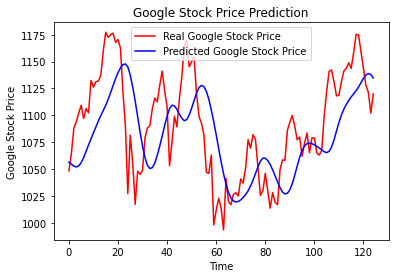

In [125]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()